<a href="https://colab.research.google.com/github/ongfong/data_analysis_projects/blob/main/candlestick_stock_aapl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplfinance

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as fplt

In [4]:
df = pd.read_csv('/content/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [6]:
df['date'] = pd.to_datetime(df['date'],format='%Y/%m/%d')

In [7]:
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [32]:
df = df.rename(columns={'Name':'Tick'})
df

,date,open,high,low,close,volume,Tick
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [11]:
null = df.isnull().sum()
print(null)

date       0
open      11
high       8
low        8
close      0
volume     0
Tick       0
dtype: int64


In [12]:
df.dropna(inplace=True)

In [13]:
null = df.isnull().sum()
print(null)

date      0
open      0
high      0
low       0
close     0
volume    0
Tick      0
dtype: int64


In [27]:
aapl = df.loc[df['Tick'] == 'AAPL']
aapl.head()

,date,open,high,low,close,volume,Tick
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [39]:
mask = (aapl['date'] >= '2017-01-01') & (aapl['date'] <= '2017-12-31')
aapl_2017 = aapl.loc[mask]
aapl_2017

,date,open,high,low,close,volume,Tick
2241,2017-01-03,115.80,116.3300,114.760,116.15,28781865,AAPL
2242,2017-01-04,115.85,116.5100,115.750,116.02,21118116,AAPL
2243,2017-01-05,115.92,116.8642,115.810,116.61,22193587,AAPL
2244,2017-01-06,116.78,118.1600,116.470,117.91,31751900,AAPL
2245,2017-01-09,117.95,119.4300,117.940,118.99,33561948,AAPL
...,...,...,...,...,...,...,...
2487,2017-12-22,174.68,175.4240,174.500,175.01,16349444,AAPL
2488,2017-12-26,170.80,171.4700,169.679,170.57,33185536,AAPL
2489,2017-12-27,170.10,170.7800,169.710,170.60,21498213,AAPL
2490,2017-12-28,171.00,171.8500,170.480,171.08,16480187,AAPL


In [40]:
aapl_2017.set_index(aapl_2017['date'],inplace=True)

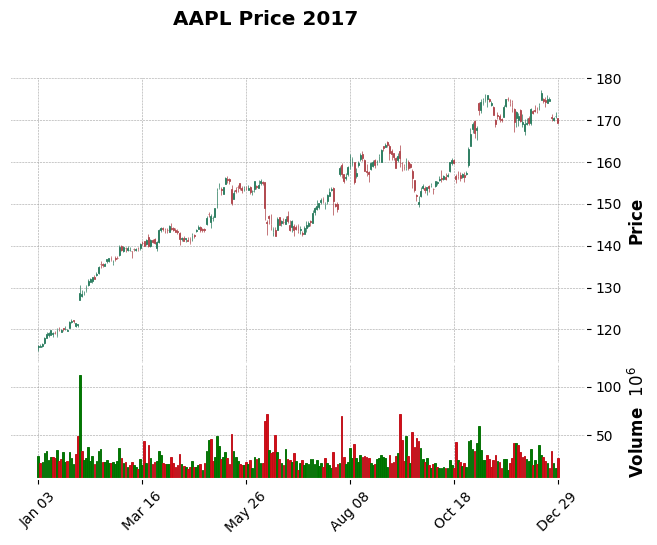

In [42]:
fplt.plot(
    aapl_2017,
    type='candle',
    style='charles',
    title = 'AAPL Price 2017',
    volume = True,
)